In [2]:
from cvxpy import *
import numpy as np
import scipy.spatial.distance as sdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as sk
from sklearn import decomposition
import time
import warnings
warnings.filterwarnings('ignore')

In [22]:
X = np.fromfile("bb_ly_sincos.dat")
X = np.reshape(X, [10010, 512])

Xassign = []
for i in range(10):
    for j in range(100):
        Xassign.append(i)
Xassign = np.asarray(Xassign)

Xassign_100 = []
for i in range(10):
    for j in range(10):
        Xassign_100.append(i)
Xassign_100 = np.asarray(Xassign_100)


Xassign_10 = []
for i in range(10):
    Xassign_10.append(i)
Xassign_10 = np.asarray(Xassign_10)


Xassign_1000 = []
for i in range(10):
    for j in range(1000):
        Xassign_1000.append(i)
Xassign_1000 = np.asarray(Xassign_1000)
Xassign_1000.shape

Xassign_1010 = []
for i in range(10):
    for j in range(1001):
        Xassign_1010.append(i)
Xassign_1010 = np.asarray(Xassign_1010)
Xassign.shape

(1000,)

In [23]:
X0 = np.array(X[0:1000])
X1 = np.array(X[1000:2000])
X2 = np.array(X[2000:3000])
X3 = np.array(X[3000:4000])
X4 = np.array(X[4000:5000])
X5 = np.array(X[5000:6000])
X6 = np.array(X[6000:7000])
X7 = np.array(X[7000:8000])
X8 = np.array(X[8000:9000])
X9 = np.array(X[9000:10000])

In [24]:
X0_set = np.array(np.vsplit(X0, 100))
X1_set = np.array(np.vsplit(X1, 100))
X2_set = np.array(np.vsplit(X2, 100))
X3_set = np.array(np.vsplit(X3, 100))
X4_set = np.array(np.vsplit(X4, 100))
X5_set = np.array(np.vsplit(X5, 100))
X6_set = np.array(np.vsplit(X6, 100))
X7_set = np.array(np.vsplit(X7, 100))
X8_set = np.array(np.vsplit(X8, 100))
X9_set = np.array(np.vsplit(X9, 100))

print(X0.shape)

X0_mixed = np.zeros(X0_set.shape)
X1_mixed = np.zeros(X0_set.shape)
X2_mixed = np.zeros(X0_set.shape)
X3_mixed = np.zeros(X0_set.shape)
X4_mixed = np.zeros(X0_set.shape)
X5_mixed = np.zeros(X0_set.shape)
X6_mixed = np.zeros(X0_set.shape)
X7_mixed = np.zeros(X0_set.shape)
X8_mixed = np.zeros(X0_set.shape)
X9_mixed = np.zeros(X0_set.shape)

# XM = np.zeros([1000,512])
# X0_mixed = np.copy(XM)
# X1_mixed = np.copy(XM)
# X2_mixed = np.copy(XM)
# X3_mixed = np.copy(XM)
# X4_mixed = np.copy(XM)
# X5_mixed = np.copy(XM)
# X6_mixed = np.copy(XM)
# X7_mixed = np.copy(XM)
# X8_mixed = np.copy(XM)
# X9_mixed = np.copy(XM)


X_all_orig = np.array([X0_set,X1_set,X2_set,X3_set,X4_set,
                 X5_set,X6_set,X7_set,X8_set,X9_set])
j = 0
a = 10

for i in range(10):
    X0_mixed[j:j+10] = X_all_orig[i][0:10]
    j+=a
    
j = 0
for i in range(10):
    X1_mixed[j:j+10] = X_all_orig[i][10:20]
    j+=a
    
j = 0
for i in range(10):
    X2_mixed[j:j+10] = X_all_orig[i][20:30]
    j+=a
    
j = 0
for i in range(10):
    X3_mixed[j:j+10] = X_all_orig[i][30:40]
    j+=a
    
j = 0
for i in range(10):
    X4_mixed[j:j+10] = X_all_orig[i][40:50]
    j+=a
    
j = 0
for i in range(10):
    X5_mixed[j:j+10] = X_all_orig[i][50:60]
    j+=a
    
j = 0
for i in range(10):
    X6_mixed[j:j+10] = X_all_orig[i][60:70]
    j+=a
    
j = 0
for i in range(10):
    X7_mixed[j:j+10] = X_all_orig[i][70:80]
    j+=a
    
j = 0
for i in range(10):
    X8_mixed[j:j+10] = X_all_orig[i][80:90]
    j+=a
    
j = 0
for i in range(10):
    X9_mixed[j:j+10] = X_all_orig[i][90:100]
    j+=a
    
X0_mixed = np.vstack(X0_mixed)
X1_mixed = np.vstack(X1_mixed)
X2_mixed = np.vstack(X2_mixed)
X3_mixed = np.vstack(X3_mixed)
X4_mixed = np.vstack(X4_mixed)
X5_mixed = np.vstack(X5_mixed)
X6_mixed = np.vstack(X6_mixed)
X7_mixed = np.vstack(X7_mixed)
X8_mixed = np.vstack(X8_mixed)
X9_mixed = np.vstack(X9_mixed)

X_all_mixed = np.array([X0_mixed,X1_mixed,X2_mixed,X3_mixed,X4_mixed,
                      X5_mixed,X6_mixed,X7_mixed,X8_mixed,X9_mixed])

(1000, 512)


In [25]:
NMI_set = []

def my_spectral_clustering(X_set):
    start = time.time()
    ## Let's implement a simple spectral clustering of the data
    print('Shape of data: ' + str(X_set.shape))
    sigma = 1.0
    x = X_set.T
    # Xassign = Xassign
    # Ground truth for 'X' set
    ## Calculate pairwise distances (Euclidean)
    print('Calculating pairwise distance matrix...')
    Xdist = sdist.squareform(sdist.pdist(np.transpose(x)))
    print('Done!')
    ## Set affinity scaling factor
    # sigma = float(input("Sigma: "))
    ## Calculate affinities
    Xaff = np.exp((-1.0*np.power(Xdist,2))/(2.0 * np.power(sigma,2)))
    Xaff[range(len(Xaff)),range(len(Xaff))] = 0.0
    origXaff = Xaff
    ## Get row sums
    Xaff_D = np.diagflat(1.0 / np.sqrt(np.apply_along_axis(np.sum,0,Xaff)))
    ## Normalization
    print('Normalizing...')
    Xnorm = np.matmul(np.matmul(Xaff_D,Xaff),Xaff_D)
    print('Done!')
    ## Decomposition
    print('Calculating eigen decomposition...')
    Evals, Evecs = np.linalg.eigh(Xnorm)
    print('Done!')

    ## Perform clustering
    print('Performing spectral clustering...')
    Xnew = Evecs[:,[-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]]
    kmeans = KMeans(n_clusters=10).fit(Xnew)
    print('Done!')
    end = time.time()    
    # Let's quantify the performance
    # jointPDF = np.zeros([10,10])
    # for x in range(len(Xassign)):
    #     jointPDF[Xassign[x],kmeans.labels_[x]] += 1
    # jointPDF /= len(Xassign)
    # jointPDF += 0.000000000000001
    # marginals = np.outer(np.apply_along_axis(np.sum,1,jointPDF),np.apply_along_axis(np.sum,0,jointPDF))
    # print('Mutual Information')
    # print(np.sum(jointPDF*np.log2(jointPDF/marginals)))
    # plt.imshow(jointPDF)
    pca = decomposition.PCA(n_components=2)
    X_pca = pca.fit_transform(x.T)
    color = ['xkcd:red','xkcd:blue','xkcd:green','xkcd:orange','xkcd:purple','xkcd:brown','xkcd:lime green','xkcd:cyan','xkcd:pink','xkcd:magenta']
    plt.scatter(X_pca[:, 0], X_pca[:, 1],
           color=[color[i] for i in Xassign.astype(int)],
           s=20)
    plt.show()
    plt.scatter(X_pca[:,0], X_pca[:,1],
                c=[color[i] for i in kmeans.labels_.astype(int)],
                s=20)
    plt.show()
    NMI = sk.normalized_mutual_info_score(Xassign, kmeans.labels_)
    NMI_set.append(NMI)
    print("NMI: " + str(NMI))
    print('Hybrid clustering complete! Elapsed time is ' + str(start - end) + ' seconds.')


Shape of data: (1000, 512)
Calculating pairwise distance matrix...
Done!
Normalizing...
Done!
Calculating eigen decomposition...
Done!
Performing spectral clustering...
Done!


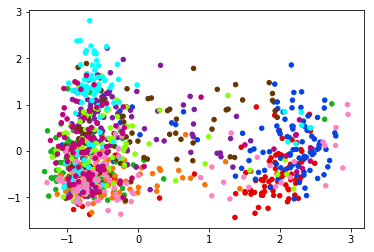

Calculating NMI...
NMI: 0.10172074425311682


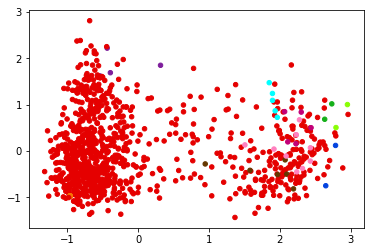

Shape of data: (1000, 512)
Calculating pairwise distance matrix...
Done!
Normalizing...
Done!
Calculating eigen decomposition...
Done!
Performing spectral clustering...
Done!


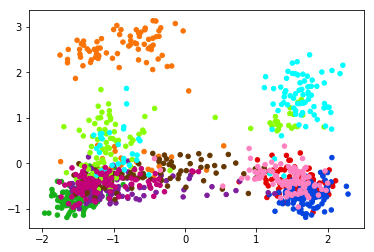

Calculating NMI...
NMI: 0.6314334209841634


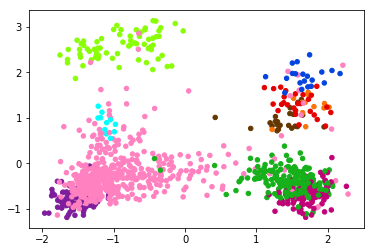

Shape of data: (1000, 512)
Calculating pairwise distance matrix...
Done!
Normalizing...
Done!
Calculating eigen decomposition...
Done!
Performing spectral clustering...
Done!


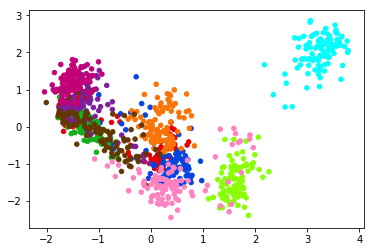

Calculating NMI...
NMI: 0.618398205286018


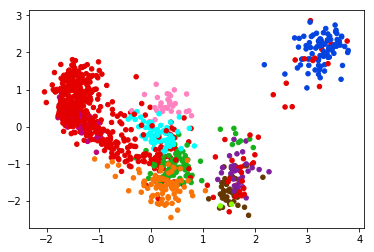

Shape of data: (1000, 512)
Calculating pairwise distance matrix...
Done!
Normalizing...
Done!
Calculating eigen decomposition...
Done!
Performing spectral clustering...
Done!


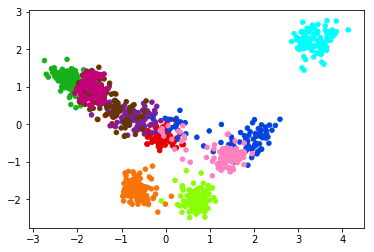

Calculating NMI...
NMI: 0.8983211398745136


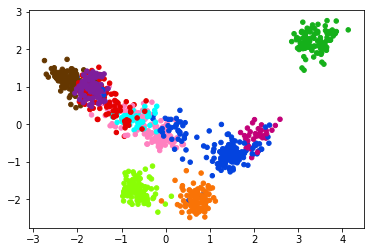

Shape of data: (1000, 512)
Calculating pairwise distance matrix...
Done!
Normalizing...
Done!
Calculating eigen decomposition...
Done!
Performing spectral clustering...
Done!


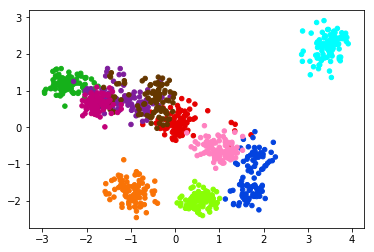

Calculating NMI...
NMI: 0.8201106623103579


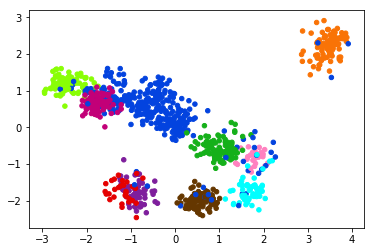

Shape of data: (1000, 512)
Calculating pairwise distance matrix...
Done!
Normalizing...
Done!
Calculating eigen decomposition...
Done!
Performing spectral clustering...
Done!


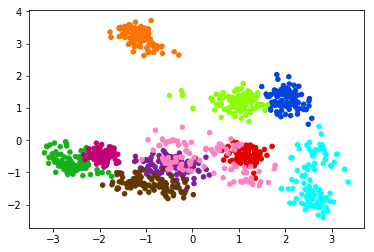

Calculating NMI...
NMI: 0.9742133662452083


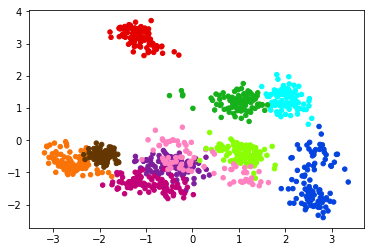

Shape of data: (1000, 512)
Calculating pairwise distance matrix...
Done!
Normalizing...
Done!
Calculating eigen decomposition...
Done!
Performing spectral clustering...
Done!


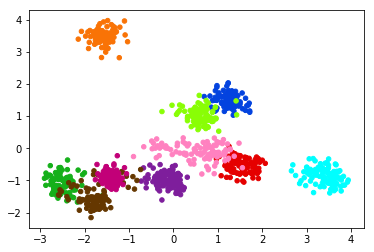

Calculating NMI...
NMI: 0.8578280178206659


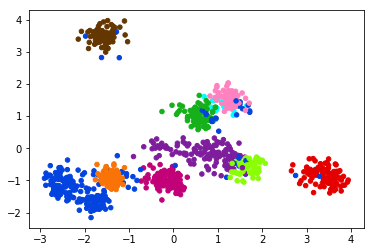

Shape of data: (1000, 512)
Calculating pairwise distance matrix...
Done!
Normalizing...
Done!
Calculating eigen decomposition...
Done!
Performing spectral clustering...
Done!


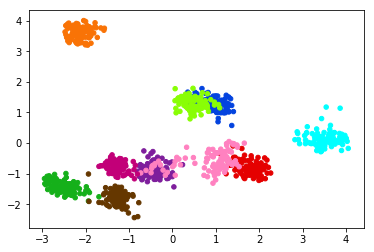

Calculating NMI...
NMI: 0.8796957639243361


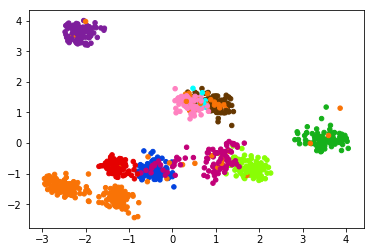

Shape of data: (1000, 512)
Calculating pairwise distance matrix...
Done!
Normalizing...
Done!
Calculating eigen decomposition...
Done!
Performing spectral clustering...
Done!


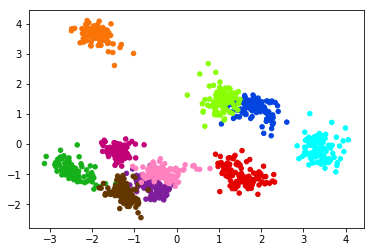

Calculating NMI...
NMI: 0.7758014430949806


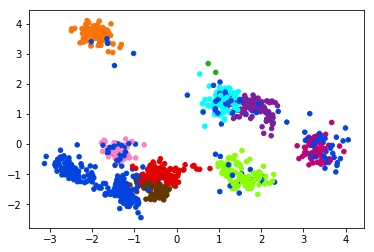

Shape of data: (1000, 512)
Calculating pairwise distance matrix...
Done!
Normalizing...
Done!
Calculating eigen decomposition...
Done!
Performing spectral clustering...
Done!


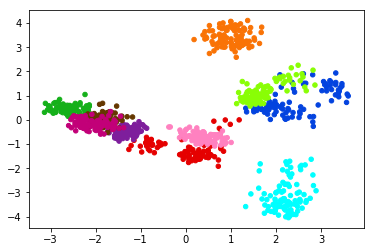

Calculating NMI...
NMI: 0.5496949065248505


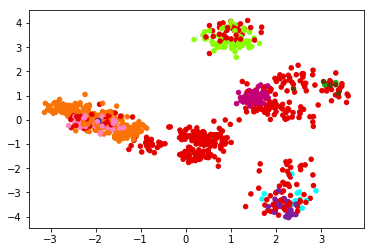

In [26]:
for j in X_all_mixed:
    my_spectral_clustering(j)

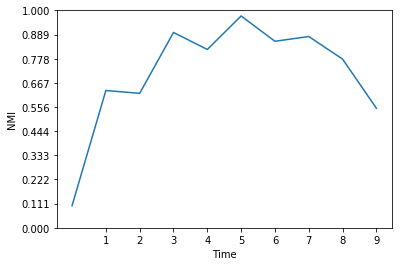

In [17]:
NMI_plot = np.asarray([0.10172074425311682, 0.6314334209841634,
0.618398205286018,
0.8983211398745136,
0.8201106623103579,
0.9742133662452083,
0.8578280178206659,
0.8796957639243361,
0.7758014430949806,
0.5496949065248505])

plt.ylabel('NMI')
plt.xticks(np.arange(1,11))
plt.yticks(np.linspace(0, 1, 10))
plt.ylim(0.0, 1.0)
plt.xlabel('Time')
plt.plot(NMI_plot)
plt.show()